<a href="https://colab.research.google.com/github/Purvajaa/ai-ml/blob/main/RFmodelBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('/content/kidney_disease.csv')

In [41]:
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);  # xticks1=range(0, 40000,2000)
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

In [42]:
import numpy as np
import statsmodels.api as sm

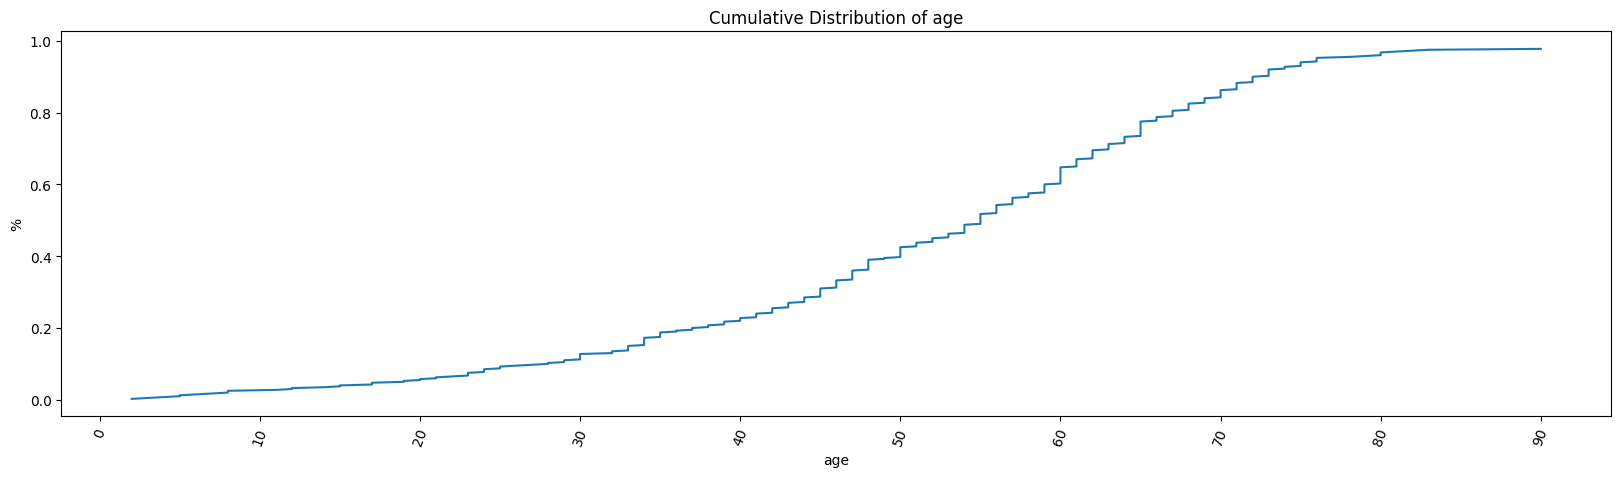

In [43]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x, y = ecdf(df.age)

plt.figure(figsize=(20,5))
plt.plot(x, y)
plt.xticks(rotation=70)
desc(title = "Cumulative Distribution of age"
     , xlabel='age'
     , ylabel='%'
    , xticks1 = range(0, 100, 10));

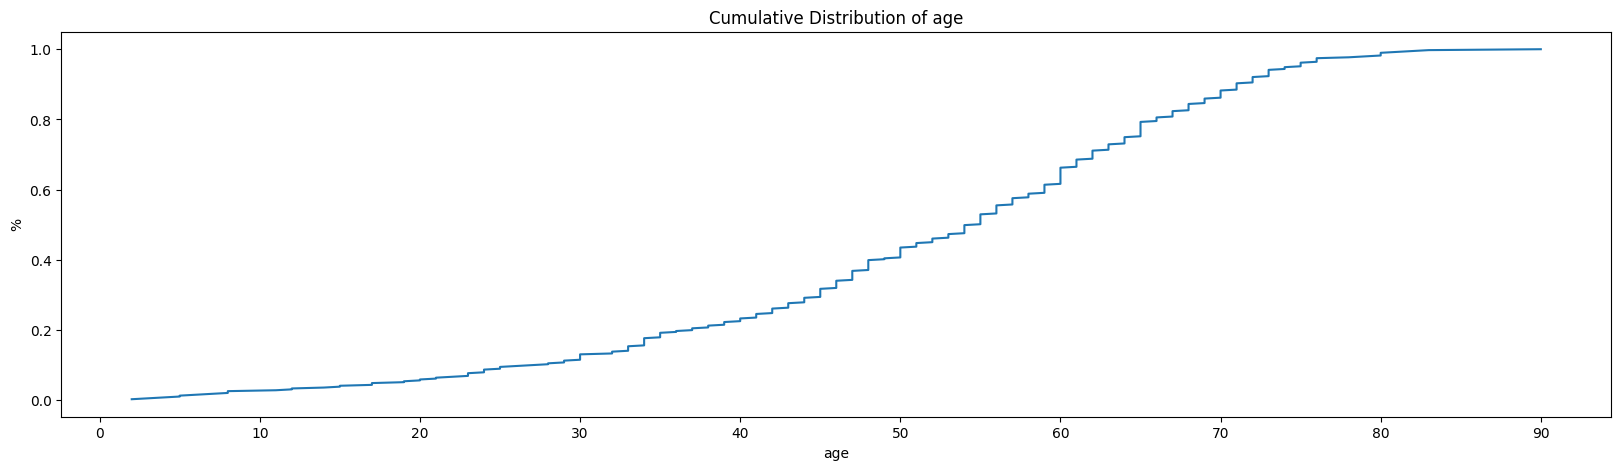

In [44]:
df_majority = df[df.age < 15000]

# plot out the Cumulative Distribution of the dependant varible, shares.
x, y = ecdf(df_majority.age)

plt.figure(figsize=(20,5))
plt.plot(x, y)
desc(title = "Cumulative Distribution of age"
     , xlabel='age'
     , ylabel='%'
    , xticks1 = range(0, 100, 10));

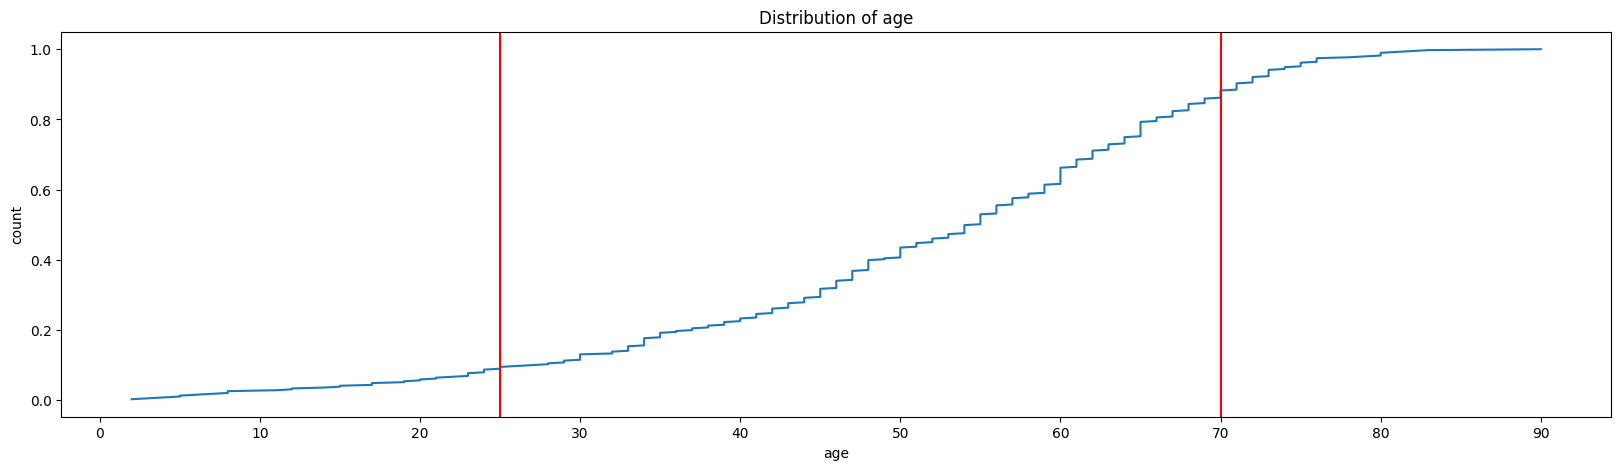

In [45]:
df_majority = df[df.age < 1000]

# plot out the Cumulative Distribution of the dependant varible, shares.
x, y = ecdf(df_majority.age)

plt.figure(figsize=(20,5))
plt.plot(x, y)
desc(title = "Distribution of age"
     , xlabel='age'
     , ylabel='count'
    , xticks1 = range(0, 100, 10))
plt.axvline(70, c ='r')
plt.axvline(25, c ='r');

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
df.classification = le.fit_transform(df.classification)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,0


In [49]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 10, 100, 1000]

# Labels for the 3 levels
bin_names = [0, 1, 2] # Name each popularity level category

# Creates acidity_levels column
df['classification'] = pd.cut(df['classification'], bin_edges, labels=bin_names)

In [50]:
 #Checks the proportion of each group
df.groupby('classification').classification.count()/df.classification.count()

classification
0    1.0
1    0.0
2    0.0
Name: classification, dtype: float64

ckd=62%
not ckd=37%
ckd\t=0.5%

RANDOM FOREST MODEL BUILDING

Step 1: Convert the categorical columns into numeric formats.

In [51]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df.classs=le.fit_transform(df.classification)
df.ba=le.fit_transform(df.ba)
df.rbc=le.fit_transform(df.rbc)
df.pc=le.fit_transform(df.pc)
df.pcc=le.fit_transform(df.pcc)
df.htn=le.fit_transform(df.htn)
df.dm=le.fit_transform(df.dm)
df.cad=le.fit_transform(df.cad)
df.appet=le.fit_transform(df.appet)
df.pe=le.fit_transform(df.pe)
df.ane=le.fit_transform(df.ane)

<ipython-input-51-22f28a0eb2f8>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.classs=le.fit_transform(df.classification)


In [52]:
cleaned_df=df.dropna()

Step 2: Split the dataset into a training set(70%) and a test set(30%)

In [53]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
y=cleaned_df['age']
y


250    40.0
251    23.0
252    45.0
253    57.0
254    51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 124, dtype: float64

In [54]:
cleaned_df=df.dropna()

In [55]:
X =cleaned_df.drop(columns =['age'],axis =1)
X.head()

,id,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
250,250,80.0,1.025,0.0,0.0,1,1,0,0,140.0,...,48,10400,4.5,0,3,1,0,0,0,0
251,251,80.0,1.025,0.0,0.0,1,1,0,0,70.0,...,52,9800,5.0,0,3,1,0,0,0,0
252,252,80.0,1.025,0.0,0.0,1,1,0,0,82.0,...,46,9100,4.7,0,3,1,0,0,0,0
253,253,80.0,1.025,0.0,0.0,1,1,0,0,119.0,...,42,6200,6.2,0,3,1,0,0,0,0
254,254,60.0,1.025,0.0,0.0,1,1,0,0,99.0,...,49,8300,5.2,0,3,1,0,0,0,0


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,)

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step 4: Build the model

In [58]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier with 100 trees(default)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Step 5: Test the model

In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.02631578947368421


ACCURACY-RANDOM FOREST-100%

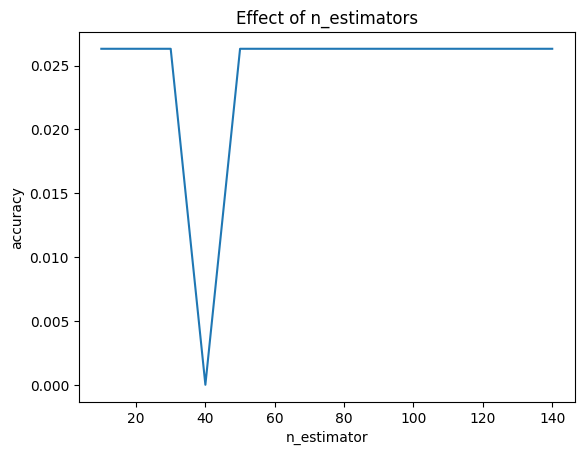

In [60]:
# Try different numbers of n_estimators
estimators = np.arange(10, 150, 10)
accuracy = []

for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy);